In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats as st
from scipy.stats import shapiro, wilcoxon


In [16]:
sns.set_theme(style="whitegrid")


# One-way ANOVA
A ANOVA unidirecional testa a hipótese nula de que dois ou mais grupos têm a mesma média populacional.

Abaixo estão os pesos de um determinado objeto em 3 balanças diferentes. 

In [4]:
balanca_1 =[11.11,11.06,13.44,11.59,13.84,13.14,12.12,12.38,11.94,12.46,11.64,12.59,11.65,12.09,11.70,11.96,11.79,13.48]
balanca_1 = np.array(balanca_1)

In [5]:
balanca_2 = [13.27,12.19,12.98,13.68,11.95,14.02,11.42,12.49,13.13,10.22,12.28,13.70,14.07,12.61,13.23,11.71,13.72,12.86]
balanca_2 = np.array(balanca_2)

In [6]:
balanca_3 = [12.25,14.44,13.89,13.28,11.80,12.74,13.51,12.85,12.44,11.78,12.62,15.98,14.76,14.03,14.88,13.64,13.26,14.72]
balanca_3 = np.array(balanca_3)

**Teste ANOVA para Igualdade de Médias de Pesos na Balança**

Para avaliar se as médias dos pesos deste objeto na balança são iguais, é aplicado o teste ANOVA.

De acordo com a [documentação do teste ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway), existem pressupostos importantes que devem ser atendidos para que o valor p associado seja considerado válido.

Principais pressupostos:

- As amostras são independentes.
- Cada amostra é proveniente de uma população normalmente distribuída.
- Os desvios padrão populacionais dos grupos são todos iguais, caracterizando a homocedasticidade.
- O comprimento de cada grupo deve ser pelo menos um e deve haver pelo menos um grupo com comprimento maior que um.




## Análise da distribuição e teste de normalidade

<AxesSubplot:ylabel='Count'>

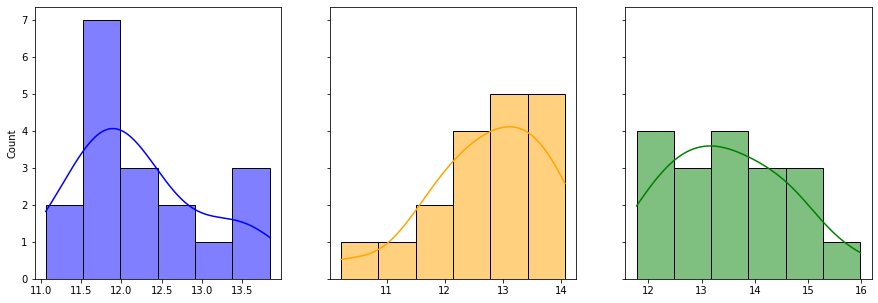

In [11]:
ig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(balanca_1, kde=True, color='blue', label='Balança 1', ax=axs[0])
sns.histplot(balanca_2, kde=True, color='orange', label='Balança 2', ax=axs[1])
sns.histplot(balanca_3, kde=True, color='green', label='Balança 3', ax=axs[2])

In [29]:
st.shapiro(balanca_1)

ShapiroResult(statistic=0.9317678213119507, pvalue=0.20857878029346466)

In [30]:
st.shapiro(balanca_2)

ShapiroResult(statistic=0.943810224533081, pvalue=0.3362618386745453)

In [31]:
st.shapiro(balanca_3)

ShapiroResult(statistic=0.9693876504898071, pvalue=0.7860963344573975)

## Teste ANOVA para Igualdade de Médias de Pesos em Três Balanças

O objetivo deste estudo é avaliar se as médias dos pesos de um objeto em três balanças distintas são estatisticamente iguais. Vejamos as hipóteses e o resultado do teste ANOVA:

- **Hipótese Nula (H0):** A média dos pesos nas três balanças é igual.
- **Hipótese Alternativa (H1):** Pelo menos uma das médias dos pesos nas balanças é diferente.

In [34]:
st.f_oneway(balanca_1,balanca_2,balanca_3)

F_onewayResult(statistic=7.3150714347874475, pvalue=0.0016102899183974087)

Com um nível de significância de 5%, aplicamos o teste ANOVA para examinar as diferenças nas médias dos pesos entre as balanças. O resultado do teste ANOVA foi calculado como estatística F = 7.32, com um p-valor associado de 0.0016.

Com base na análise do p-valor, que é menor que 0.05, temos evidências suficientes para rejeitar a hipótese nula. Portanto, podemos concluir que há diferenças estatisticas entre pelo menos duas das médias dos pesos nas balanças. Em outras palavras, encontramos evidências para sugerir que as médias dos pesos do objeto nas três balanças são distintas.

## Teste de Tukey para Comparação de Médias


Após a conclusão do teste ANOVA, que indicou diferenças estatisticamente significativas nas médias dos pesos entre as balanças, aplicamos o teste de Tukey para realizar comparações múltiplas e identificar quais delas são diferentes entre si

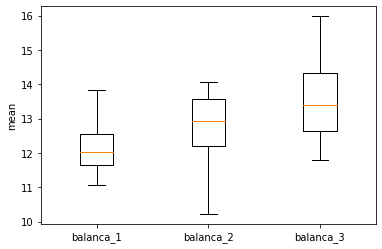

In [36]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([balanca_1, balanca_2, balanca_3])
ax.set_xticklabels(["balanca_1", "balanca_2", "balanca_3"]) 
ax.set_ylabel("mean") 
plt.show()

In [38]:
res = st.tukey_hsd(balanca_1, balanca_2, balanca_3)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.531     0.260    -1.337     0.276
 (0 - 2)     -1.272     0.001    -2.078    -0.465
 (1 - 0)      0.531     0.260    -0.276     1.337
 (1 - 2)     -0.741     0.078    -1.547     0.065
 (2 - 0)      1.272     0.001     0.465     2.078
 (2 - 1)      0.741     0.078    -0.065     1.547



Os resultados indicam que há diferenças estatisticas nas médias de peso entre as Balanças 1 e 3.